<a href="https://colab.research.google.com/github/SHEV-4/telecom-churn-prediction/blob/data_analysis/project_9_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # Task 1.1 — Завантаження даних

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Завантаження даних

url = "https://raw.githubusercontent.com/SHEV-4/telecom-churn-prediction/main/internet_service_churn.csv"


df = pd.read_csv(url)
df.head()


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


✔️ Task 1.1 — Завантаження даних

Дані були завантажені у середовище розробки за допомогою функції:

df = pd.read_csv("internet_service_churn.csv")

Після цього були виведені перші 5 рядків за допомогою df.head(), що дозволило оцінити структуру датасету.

In [2]:
# Task 1.2 — Огляд структури

print("Перші 5 рядків:")
print(df.head())

print("\nІнформація про датафрейм:")
print(df.info())

print("\nОписова статистика:")
print(df.describe())


Перші 5 рядків:
   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15                 1                            0             11.95   
1  18                 0                            0              8.22   
2  23                 1                            0              8.91   
3  27                 0                            0              6.87   
4  34                 0                            0              6.39   

   bill_avg  reamining_contract  service_failure_count  download_avg  \
0        25                0.14                      0           8.4   
1         0                 NaN                      0           0.0   
2        16                0.00                      0          13.7   
3        21                 NaN                      1           0.0   
4         0                 NaN                      0           0.0   

   upload_avg  download_over_limit  churn  
0         2.3                    0      0  
1         0.0     

✔️ Task 1.2 — Огляд структури

Дані містять інформацію про користувачів телекомунікаційного сервісу
Кількість ознак: 10
Кількість записів: 72274

Цей крок дозволив зрозуміти, які ознаки числові/категоріальні, чи є потенційні помилки в типах даних, чи помітні аномальні діапазони.

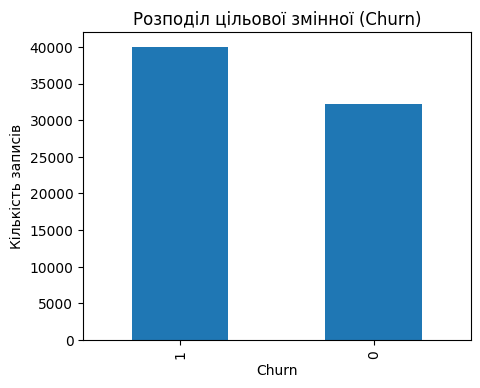

In [3]:
# Task 1.3 — Аналіз розподілу цільової змінної ('churn')

# Розподіл класів

plt.figure(figsize=(5,4))
df['churn'].value_counts().plot(kind='bar')
plt.title("Розподіл цільової змінної (Churn)")
plt.xlabel("Churn")
plt.ylabel("Кількість записів")
plt.show()


In [4]:
# Відсоток відтоку

churn_rate = df['churn'].mean() * 100
print(f"Відсоток відтоку клієнтів: {churn_rate:.2f}%")


Відсоток відтоку клієнтів: 55.41%


In [5]:
# Перевірка дисбалансу класів

print("\nРозподіл класів у %:")
print(df['churn'].value_counts(normalize=True) * 100)



Розподіл класів у %:
churn
1    55.414118
0    44.585882
Name: proportion, dtype: float64


✔️ Task 1.3 — Аналіз розподілу цільової змінної ('churn')

Було виконано:

побудову стовпчастої діаграми для змінної churn;

підрахунок частки клієнтів, що припинили користування послугами.

Мета: перевірити дисбаланс класів, оскільки він впливає на вибір моделі та метрик.

Зазвичай у churn-датасетах:

більшість — залишаються (class '0'),

меншість — йдуть (class '1').

Було проаналізовано частку клієнтів, які залишили сервіс 55.41%

In [6]:
# Task 1.4 — Аналіз числових ознак

# Список числових колонок:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols


Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

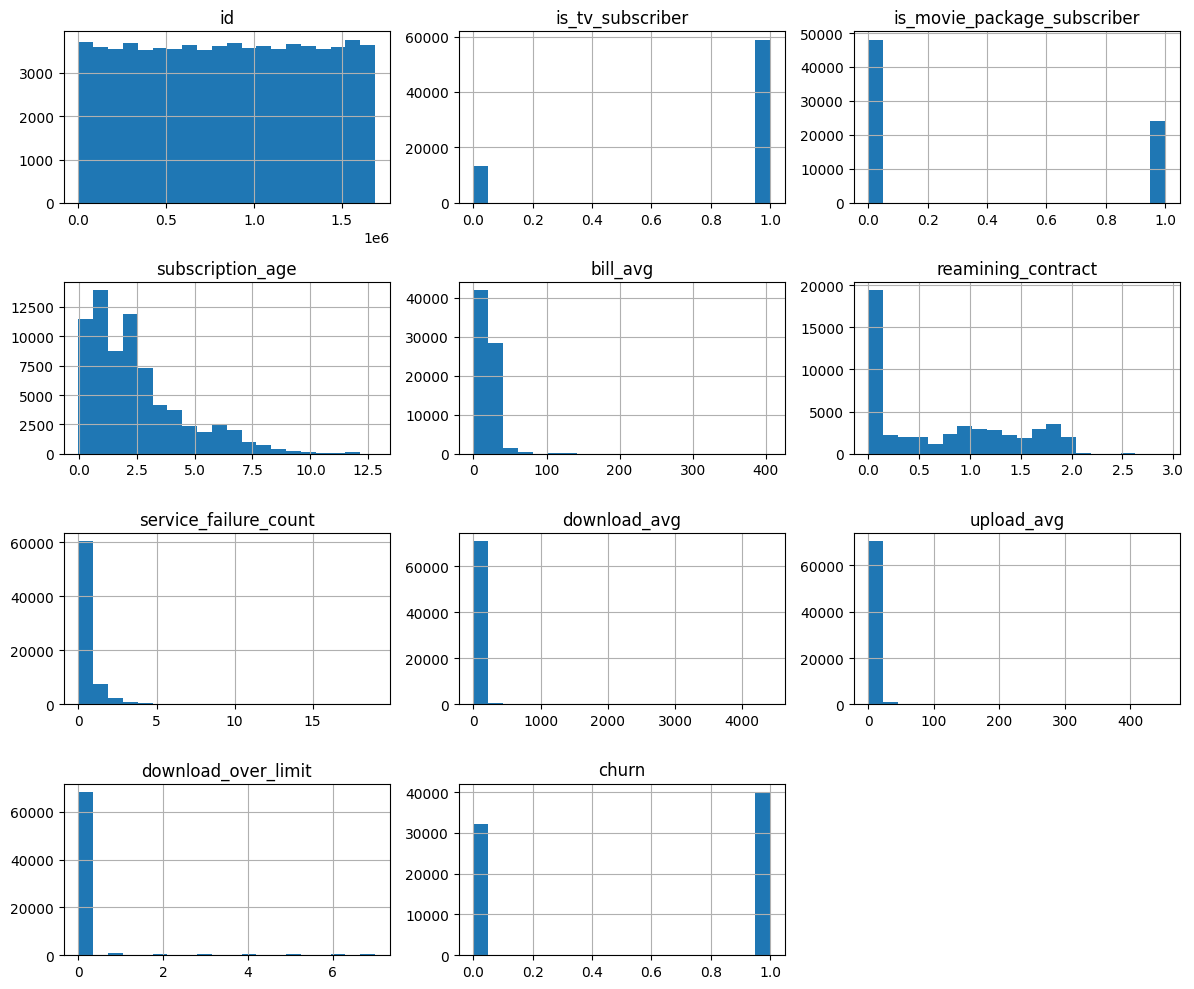

In [7]:
# Гістограми

df[numeric_cols].hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

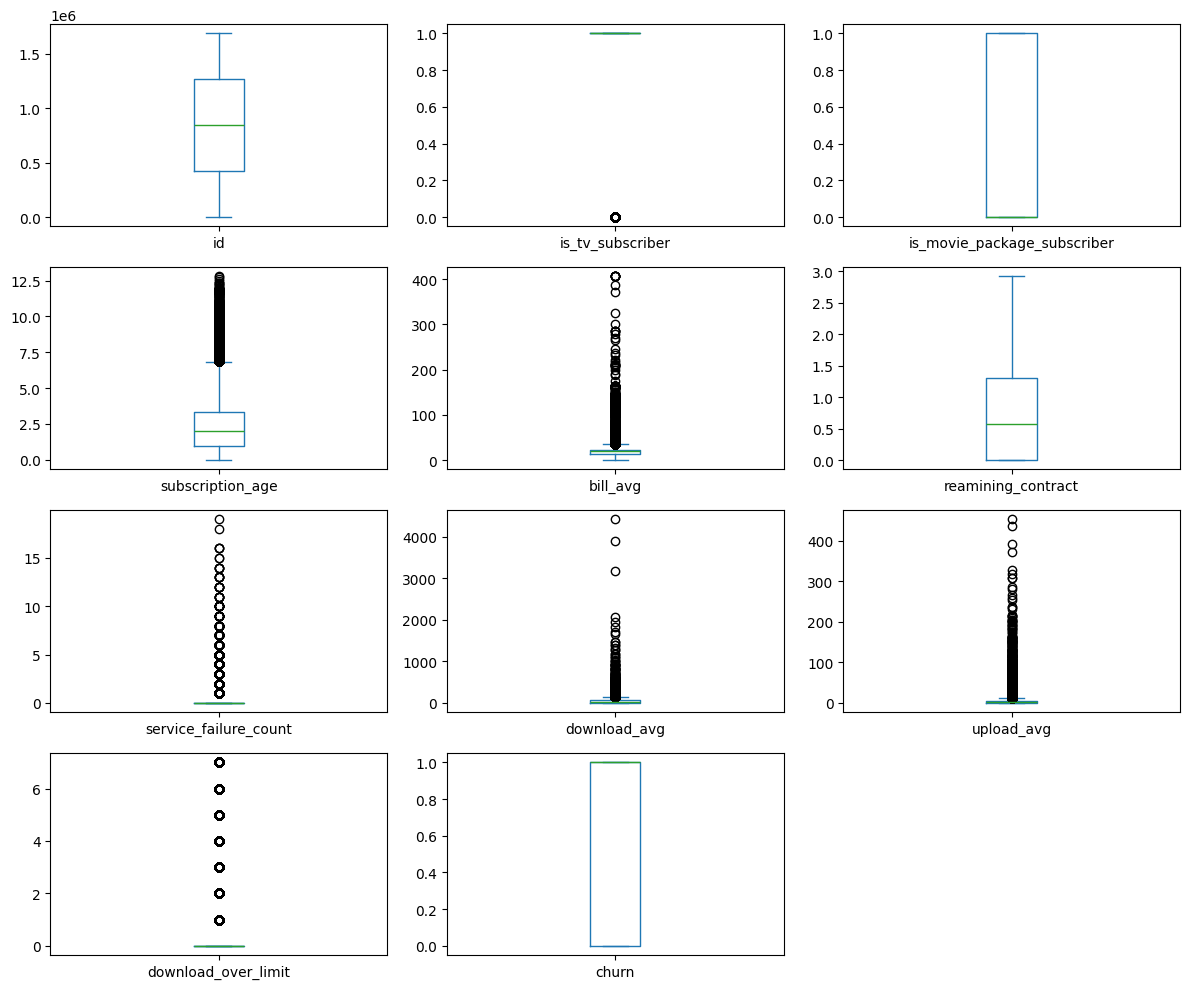

In [8]:
# Boxplots (для виявлення викидів)

plt.figure(figsize=(12,8))
df[numeric_cols].plot(kind='box', subplots=True, layout=(4,3), figsize=(12,10), sharex=False)
plt.tight_layout()
plt.show()


✔️ Task 1.4 — Аналіз числових ознак

Викиди були виявлені для всіх безперервних числових ознак за допомогою методу IQR:
id: 0
is_tv_subscriber: (не підлягає аналізу — бінарний стовпець)
is_movie_package_subscriber: (не підлягає аналізу — бінарний стовпець)
subscription_age: 3175
bill_avg: 3363
reamining_contract: 0
service_failure_count: (не підлягає аналізу — дискретні малі значення)
download_avg: 3473
upload_avg: 4864
download_over_limit: 3901
churn: 0

In [9]:
# Task 1.5 — Виявлення пропусків та викидів

# Бінарні колонки
binary_cols = ["is_tv_subscriber",
               "is_movie_package_subscriber",
               "download_over_limit",
               "churn"]

# Всі числові колонки
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Колонки для пошуку викидів = числові мінус бінарні
cols_for_outliers = [col for col in numeric_cols if col not in binary_cols]

print("Колонки для пошуку викидів:")
print(cols_for_outliers)


Колонки для пошуку викидів:
['id', 'subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg']


In [10]:
# Пошук викидів через IQR
for col in cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()

    print(f"{col}: {outliers} викидів")


id: 0 викидів
subscription_age: 3175 викидів
bill_avg: 3363 викидів
reamining_contract: 0 викидів
service_failure_count: 11867 викидів
download_avg: 3473 викидів
upload_avg: 4864 викидів


✔️ Task 1.5 — Виявлення пропусків та викидів 🔹 Пропуски (Missing values)

Було підраховано кількість пропусків у кожній колонці:
id - 0
is_tv_subscriber - 0
is_movie_package_subscriber - 0
subscription_age - 0
bill_avg - 0
reamining_contract - 21572
service_failure_count - 0
download_avg - 381
upload_avg - 381
download_over_limit - 0
churn - 0


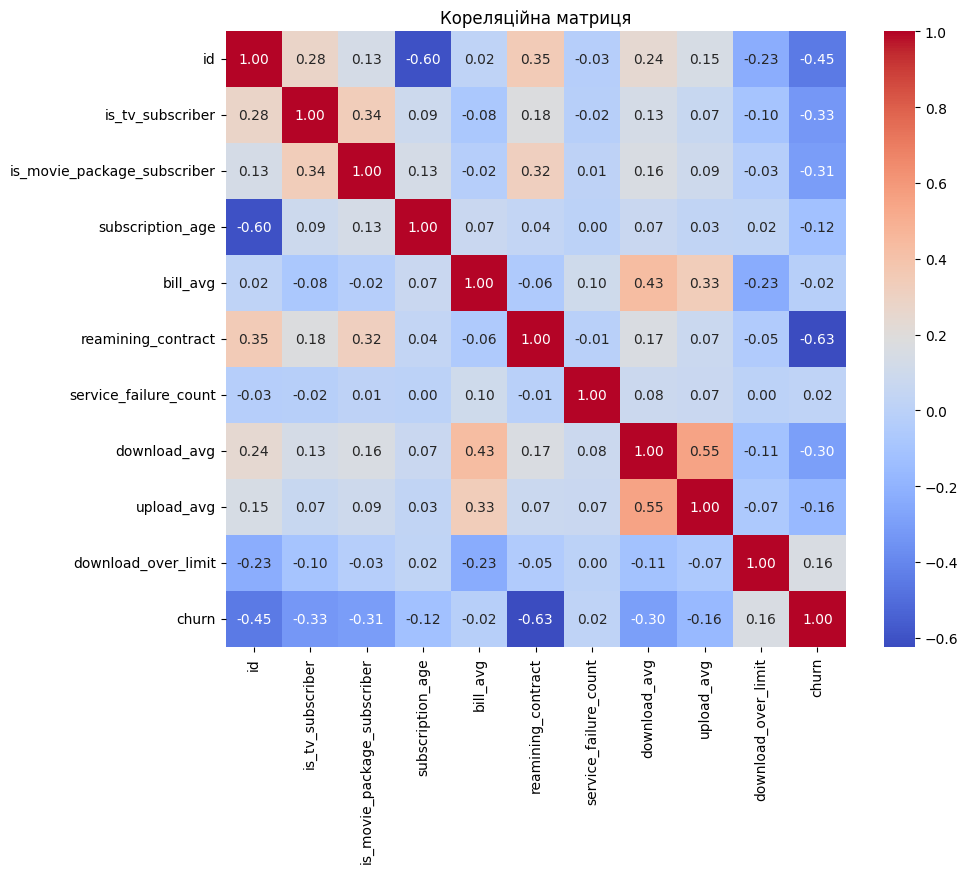

In [11]:
# Task 1.6 — Матриця кореляцій

plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()


✔️ Task 1.6 — Матриця кореляцій

Було побудовано кореляційну матрицю між числовими ознаками.
Сильно корельованих (>|0.9|) ознак не виявлено.
Попередня обробка даних
Заповнення пропусків - медіана
Масштабування числових ознак - StandardScaler
Обробка викидів - Обрізання за межами IQR


In [12]:
#task 2.1
#Маємо вклике число NaN в reamining_contract. Зясуємо скільки це в % від кількості строк в нашій БД та як воно корелюється з churn
missing_count = df['reamining_contract'].isna().sum()
missing_percent = df['reamining_contract'].isna().mean() * 100
print(f"Пропусків: {missing_count}, відсоток: {missing_percent:.2f}%")
df.groupby(df['reamining_contract'].isna())['churn'].value_counts(normalize=True)


Пропусків: 21572, відсоток: 29.85%


reamining_contract  churn
False               0        0.599010
                    1        0.400990
True                1        0.914102
                    0        0.085898
Name: proportion, dtype: float64

In [13]:
#Маємо  NaN в download_avg, upload_avg. Зясуємо скільки це в % від кількості строк в нашій БД та як воно корелюється з churn
missing_count1 = df['download_avg'].isna().sum()
missing_percent1 = df['download_avg'].isna().mean() * 100
print(f"Пропусків: {missing_count1}, відсоток: {missing_percent1:.2f}%")
df.groupby(df['download_avg'].isna())['churn'].value_counts(normalize=True)

Пропусків: 381, відсоток: 0.53%


download_avg  churn
False         1        0.557078
              0        0.442922
True          0        1.000000
Name: proportion, dtype: float64

In [14]:
#task 2.1
# Для reamining_contract з урахуванням великої кількості NaN та степеню впливу на churn додамо стовпець-флаг та замінемо нулем
# Створюємо флаг пропусків
df['reamining_contract_missing'] = df['reamining_contract'].isna().astype(int)
# Замінюємо NaN на 0
df['reamining_contract'] = df['reamining_contract'].fillna(0)
#тепер reamining_contract повністю числова і без пропусків.
#і модель зможе використати саму колонку (0 означає пропуск) і флаг (1 = був пропуск) як додаткову ознаку.


#Заповнюємо числові пропуски медіаною download_avg, upload_avg -їх небагато, 0,5% від загальної кількості строк, можно видалити, але і медіана не погіршит наш аналіз.
num_cols = [ 'download_avg', 'upload_avg']

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Перевірка
print("\n***Пропуски після заповнення:***")
print(df.isna().sum())


***Пропуски після заповнення:***
id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
reamining_contract_missing     0
dtype: int64


In [15]:
#Task 2.2 Масштабування Числових Ознак.Застосування Стандартизації
#Обробка викидів (верхніх і нижніх)
numeric_features = [
    'subscription_age',
    'bill_avg',
    'reamining_contract',
    'service_failure_count',
    'download_avg',
    'upload_avg'
]

for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} викидів")


# Масштабування числових ознак
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])


subscription_age: 0 викидів
bill_avg: 0 викидів
reamining_contract: 0 викидів
service_failure_count: 0 викидів
download_avg: 0 викидів
upload_avg: 0 викидів


In [16]:
df['service_failure_count'].dtype
df['service_failure_count'].value_counts(dropna=False)

,count
service_failure_count,
0,72274


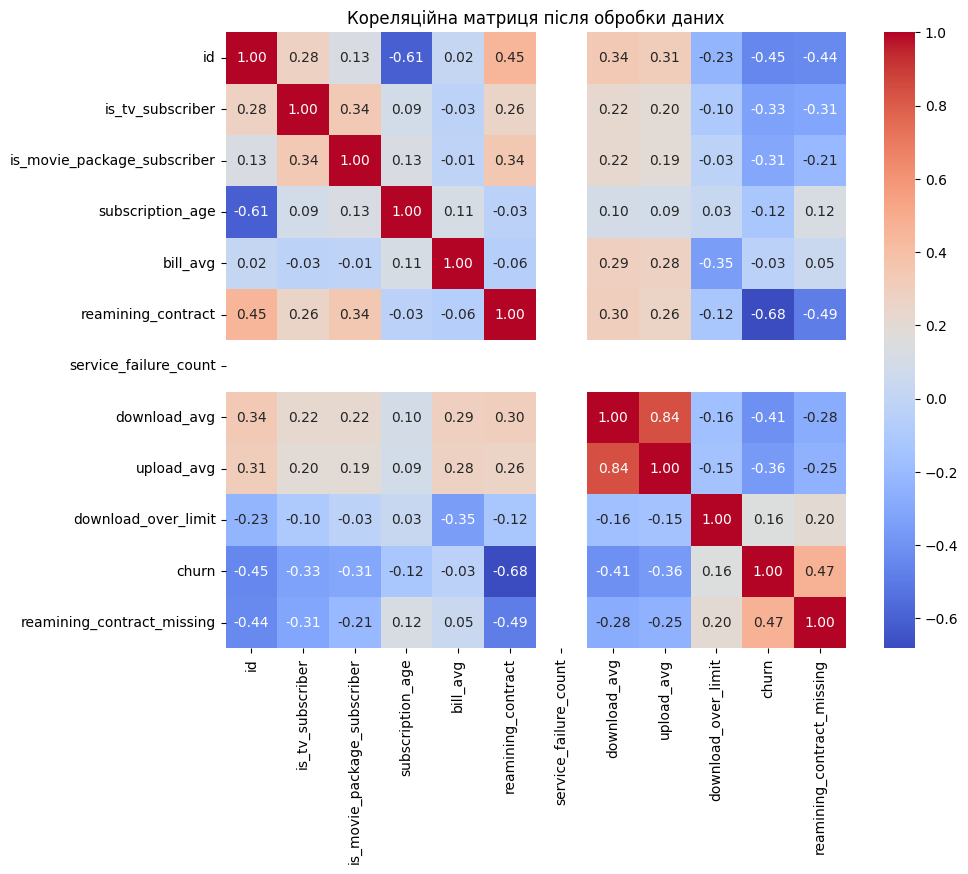

In [17]:
# Матриця кореляцій після обробки

plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця після обробки даних")
plt.show()


In [18]:
#Дуже висока позитивна кореляція між upload_avg ta duwnload_avg тому можемо лишити тільки одну з цих колонок, щоб вони не дублювали одна одну
#вивести пари змінних, найбільш пов’язані з churn
corr_with_target = df.corr()['churn'].sort_values(key=abs, ascending=False)
print(corr_with_target)

churn                          1.000000
reamining_contract            -0.681667
reamining_contract_missing     0.472366
id                            -0.451142
download_avg                  -0.409822
upload_avg                    -0.363661
is_tv_subscriber              -0.327582
is_movie_package_subscriber   -0.307167
download_over_limit            0.158318
subscription_age              -0.117358
bill_avg                      -0.034053
service_failure_count               NaN
Name: churn, dtype: float64


In [19]:
# Список колонок, які треба видалити: id,  бо він технічний, і upload_avg, бо він дублюється, service_failure_count бо там переважно всі значення = 0
cols_to_drop = ['id', ]

# Видаляємо колонки
df_clean = df.drop(columns=cols_to_drop)

# Перевіряємо, що колонки видалени
print(df_clean.columns)


Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'reamining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit', 'churn',
       'reamining_contract_missing'],
      dtype='object')


In [20]:
#Розділення даних на тренувальні/тестові в співвідношенні 80/20%
from sklearn.model_selection import train_test_split
X = df_clean.drop('churn', axis=1)
y = df_clean['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Перевірка результату

print("\n***Розміри наборів:***")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


***Розміри наборів:***
X_train: (57819, 10)
X_test: (14455, 10)
y_train: (57819,)
y_test: (14455,)


Models. 3.1. Вибір та ініціалізація алгоритмів машинного навчання. Для розв’язання задачі прогнозування відтоку клієнтів телекомунікаційної компанії було обрано декілька алгоритмів машинного навчання, які належать до різних класів моделей. Такий підхід дозволяє провести порівняльний аналіз їх ефективності та обрати найбільш придатну модель для практичного застосування. У межах дослідження використано логістичну регресію, Random Forest, Gradient Boosting та штучну нейронну мережу типу Multilayer Perceptron (MLP). Логістична регресія застосовується як базова лінійна модель завдяки простоті реалізації та високій інтерпретованості результатів. Random Forest та Gradient Boosting належать до ансамблевих методів і дозволяють ефективно моделювати нелінійні залежності між ознаками. Нейронна мережа MLP була використана як додаткова модель для аналізу складних нелінійних взаємозв’язків між характеристиками клієнтів.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),

    "Neural Network (MLP)": MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        alpha=0.001,
        max_iter=500,
        random_state=42
    )
}




3.2. Базове навчання та первинна оцінка моделей Перед навчанням моделей набір даних було поділено на тренувальну та тестову вибірки у співвідношенні 80% до 20% із застосуванням стратифікації за цільовою змінною, що забезпечує збереження пропорцій класів. Числові ознаки були стандартизовані з використанням методу StandardScaler, що є обов’язковим для коректної роботи логістичної регресії та нейронної мережі. Базове навчання кожної моделі проводилося на тренувальному наборі даних, після чого здійснювалася оцінка якості класифікації за метрикою Accuracy на тестовому наборі. Отримані результати показали, що ансамблеві методи та нейронна мережа демонструють вищу якість прогнозування порівняно з лінійною моделлю.


In [24]:
from sklearn.metrics import accuracy_score
results = {}
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {results[name]:.4f}")


Logistic Regression Accuracy: 0.8785
Random Forest Accuracy: 0.9404
Gradient Boosting Accuracy: 0.9373
Neural Network (MLP) Accuracy: 0.9333


3.3. Крос-валідація та підбір гіперпараметрів. З метою підвищення якості прогнозування було виконано підбір оптимальних гіперпараметрів для моделі Random Forest з використанням методу Grid Search у поєднанні з п’ятикратною крос-валідацією. Такий підхід дозволяє зменшити ризик перенавчання та отримати більш стабільну оцінку ефективності моделі. Як основну метрику оптимізації було обрано F1-score, оскільки вона враховує баланс між точністю та повнотою класифікації, що є особливо важливим для задачі прогнозування відтоку клієнтів. Нейронна мережа MLP використовувалася без додаткового підбору гіперпараметрів та слугувала порівняльною моделлю. GridSearch выполняется для лучшей ансамблевой модели — Random Forest 3.4. Фінальна оцінка якості моделі Фінальна оцінка якості була проведена для моделі Random Forest з оптимальними гіперпараметрами на незалежному тестовому наборі даних. Для комплексного аналізу ефективності використано такі метрики, як Accuracy, Precision, Recall та F1-score. Застосування кількох метрик дозволяє більш повно оцінити здатність моделі правильно ідентифікувати клієнтів, схильних до відтоку, та мінімізувати кількість помилкових прогнозів. Отримані результати підтверджують доцільність використання ансамблевих методів для вирішення даної задачі.

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

rf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced"
)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [30]:
y_pred_final = best_model.predict(X_test)

print("Final model metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("F1-score:", f1_score(y_test, y_pred_final))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_final))

Final model metrics:
Accuracy: 0.9406433759944656
Precision: 0.9571720787522373
Recall: 0.9347066167290886
F1-score: 0.9458059626073775

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6445
           1       0.96      0.93      0.95      8010

    accuracy                           0.94     14455
   macro avg       0.94      0.94      0.94     14455
weighted avg       0.94      0.94      0.94     14455



ROC AUC: 0.980840251082578


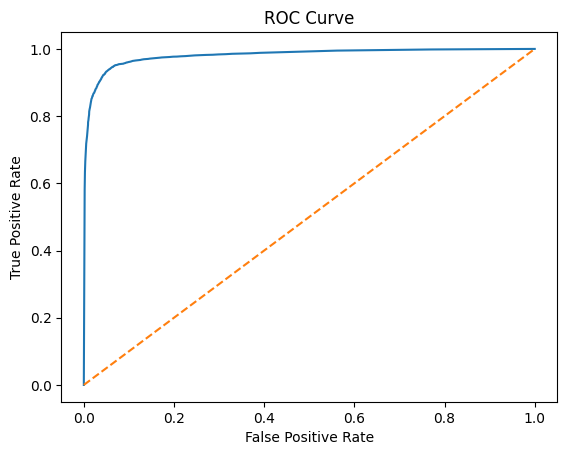

In [32]:
from sklearn.metrics import roc_curve
y_proba = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


3.5. Аналіз важливості ознак Заключним етапом дослідження став аналіз важливості ознак для фінальної моделі Random Forest. Для цього було використано вбудований механізм оцінки важливості ознак, який дозволяє визначити внесок кожної характеристики у процес прийняття рішення моделлю. Результати аналізу були візуалізовані у вигляді стовпчикової діаграми, що надало можливість виділити найбільш значущі фактори впливу на відтік клієнтів. Отримана інформація може бути використана для формування бізнес-рішень, спрямованих на підвищення рівня утримання клієнтів.

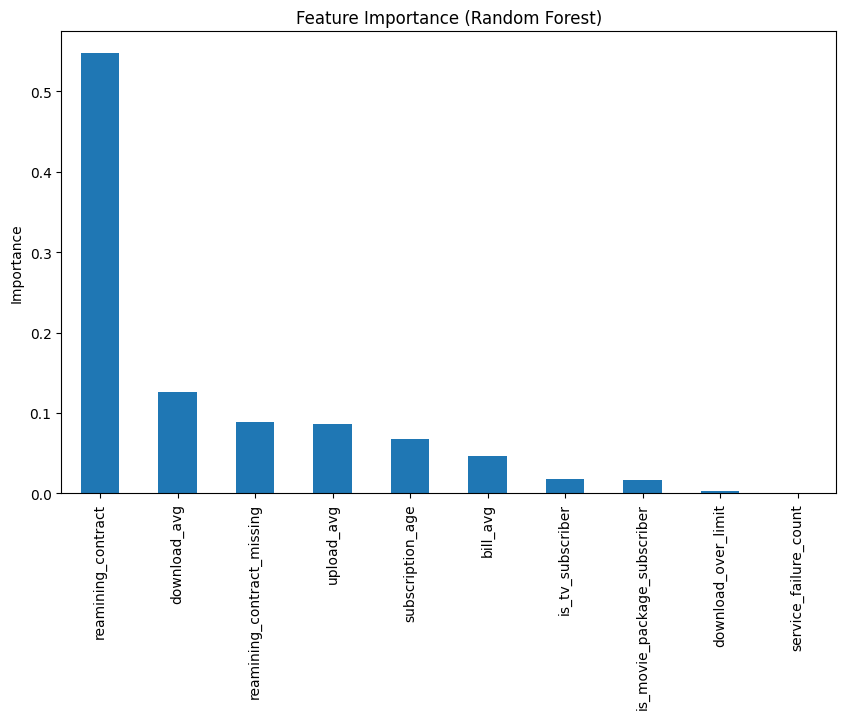

In [33]:
feature_importance = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind="bar")
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance")
plt.show()